https://huggingface.co/datasets/willcb/mammal-names

https://www.kaggle.com/datasets/thepushkarp/common-bird-names




In [87]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thepushkarp/common-bird-names")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/common-bird-names


In [88]:
import os

bird_path = "/root/.cache/kagglehub/datasets/thepushkarp/common-bird-names/versions/3"
print("Files:", os.listdir(bird_path))

Files: ['birds.csv']


In [89]:
import pandas as pd

df_birds = pd.read_csv(os.path.join(bird_path, "birds.csv"))
df_birds.head()

,ID,Common Bird Names
0,1,Abbott's babbler
1,2,Abbott's booby
2,3,Abbott's starling
3,4,Abbott's sunbird
4,5,Abd al-Kuri sparrow


In [ ]:
pip install datasets


In [228]:
from datasets import load_dataset

ds_mammal = load_dataset("willcb/mammal-names")


In [229]:
mammal_names = ds_mammal['train']['Common Name']

In [230]:
bird_names = df_birds['Common Bird Names'].tolist()

In [231]:
print(mammal_names)
len(mammal_names)

['northern pudu', 'Central American red brocket', 'Pygmy brocket', 'Sao Paulo bororo', 'Ecuador red brocket', 'red brocket', 'dwarf brocket', 'Merida brocket', 'red brocket deer', 'reindeer', 'Yucatan brown brocket', 'white-tailed deer', 'mule deer', 'Chilean guemal', 'Peruvian guemal', 'Eurasian elk', 'American moose', 'Western roe deer', 'Eastern roe deer', 'marsh deer', 'gray brocket', 'pampas deer', 'Sambar', 'Visayan spotted deer', 'Javan rusa', 'Philippine sambar', 'barasingha', "Eld's deer", "Schomburgk's deer", 'Mesopotamian fallow deer', 'fallow deer', 'Central Asian red deer', 'sika deer', 'red deer', 'white-lipped deer', 'hog deer', 'Irish elk', 'Bawean deer', 'Hog deer', 'chital', "Pere David's deer", 'Chinese water deer', "Reeves' muntjac", 'muntjak', 'black muntjac', "Fea's muntjac", 'Annamite muntjac', 'Leaf deer', 'Roosevelt muntjac', 'giant muntjac', 'Gongshanensis muntjac', 'Bornean yellow muntjac', 'tufted deer', 'Asiatic mouflon', 'argali', 'bighorn sheep', 'urial',

4162

In [232]:
print(bird_names)
len(bird_names)

["Abbott's babbler", "Abbott's booby", "Abbott's starling", "Abbott's sunbird", 'Abd al-Kuri sparrow', "Abdim's stork", 'Aberdare cisticola', 'Aberrant bush warbler', "Abert's towhee", 'Abyssinian catbird', 'Abyssinian crimsonwing', 'Abyssinian ground hornbill', 'Abyssinian ground thrush', 'Abyssinian longclaw', 'Abyssinian owl', 'Abyssinian roller', 'Abyssinian scimitarbill', 'Abyssinian slaty flycatcher', 'Abyssinian thrush', 'Abyssinian waxbill', 'Abyssinian wheatear', 'Abyssinian white-eye', 'Abyssinian woodpecker', 'Acacia pied barbet', 'Acacia tit', 'Acadian flycatcher', 'Aceh bulbul', 'Acorn woodpecker', 'Acre antshrike', 'Acre tody-tyrant', 'Adamawa turtle dove', "Adelaide's warbler", 'Admiralty cicadabird', 'Adélie penguin', 'Afep pigeon', 'Afghan babbler', 'Afghan snowfinch', 'African barred owlet', 'African black duck', 'African black swift', 'African blue flycatcher', 'African blue tit', 'African broadbill', 'African citril', 'African collared dove', 'African crake', 'Afric

10976

In [233]:
pip install -q sentence-transformers

In [234]:
from sentence_transformers import SentenceTransformer

model_all_mpnet = SentenceTransformer("sentence-transformers/all-mpnet-base-v2")

In [235]:
# Mammal embeddings and bird embeddings
mammal_embeddings = model_all_mpnet.encode(mammal_names, normalize_embeddings=True)
bird_embeddings = model_all_mpnet.encode(bird_names, normalize_embeddings=True)

In [236]:
#k-means cluster mammals (k=1)
from sklearn.cluster import KMeans
import numpy as np

kmeans_mammal = KMeans(n_clusters=1).fit(mammal_embeddings)
centroid_mammal = kmeans_mammal.cluster_centers_[0]

In [237]:
#k-means cluster birds (k=1)
kmeans_bird = KMeans(n_clusters=1).fit(bird_embeddings)
centroid_bird = kmeans_bird.cluster_centers_[0]

In [238]:
#embedding word "mammal" and "bird"
embedding_word_mammal = model_all_mpnet.encode("mammal", normalize_embeddings=True)

embedding_word_bird = model_all_mpnet.encode("bird", normalize_embeddings=True)

# **1) Compare how close the embeddings for word "mammal" is to centroid of mammal and centroid of Bird. Compare how close the embeddings for word "Bird" is to centroid of mammal and centroid of Bird.**



In [239]:

from sklearn.metrics.pairwise import cosine_similarity

sim_mammal_to_mammal = cosine_similarity([embedding_word_mammal], [centroid_mammal])[0][0]
sim_mammal_to_bird = cosine_similarity([embedding_word_mammal], [centroid_bird])[0][0]
sim_bird_to_mammal = cosine_similarity([embedding_word_bird], [centroid_mammal])[0][0]
sim_bird_to_bird = cosine_similarity([embedding_word_bird], [centroid_bird])[0][0]

print("word mammal ⟷ centroid_mammal:", sim_mammal_to_mammal)
print("word mammal ⟷ centroid_bird:", sim_mammal_to_bird)
print("word bird   ⟷ centroid_mammal:", sim_bird_to_mammal)
print("word bird   ⟷ centroid_bird:", sim_bird_to_bird)

word mammal ⟷ centroid_mammal: 0.6378998
word mammal ⟷ centroid_bird: 0.47944468
word bird   ⟷ centroid_mammal: 0.4984303
word bird   ⟷ centroid_bird: 0.67084306


**Result:
Each word is closest to its own cluster**
- "mammal" is more similar to the mammal centroid than the bird's centroid
- bird" is more similar to the bird centroid than the mammal's centroid

--> suggests that model semantically associates the word "mammal" more strongly with actual mammal names, and likewise for "bird".



**2) Compare cosine similarity between mammal's centroid and bird's centroid**

In [240]:
cos_mammal_vs_bird_centroid = cosine_similarity([centroid_mammal], [centroid_bird])[0][0]
print("centroid_mammal ⟷ centroid_bird:", cos_mammal_vs_bird_centroid)

centroid_mammal ⟷ centroid_bird: 0.8634571


Result: average embedding of mammal names is very close to average embedding of bird names.

**3) Compare cosine similarity between embeddings for word "mammal" and embeddings for word "bird"**

In [241]:
cos_mammal_vs_bird = cosine_similarity([embedding_word_mammal], [embedding_word_bird])[0][0]
print("cosine_similarity('mammal', 'bird'):", cos_mammal_vs_bird)

cosine_similarity('mammal', 'bird'): 0.50262505


**4) PCA and t-SNE to see how embeddings spread and how the centroids or concept vectors relate:**

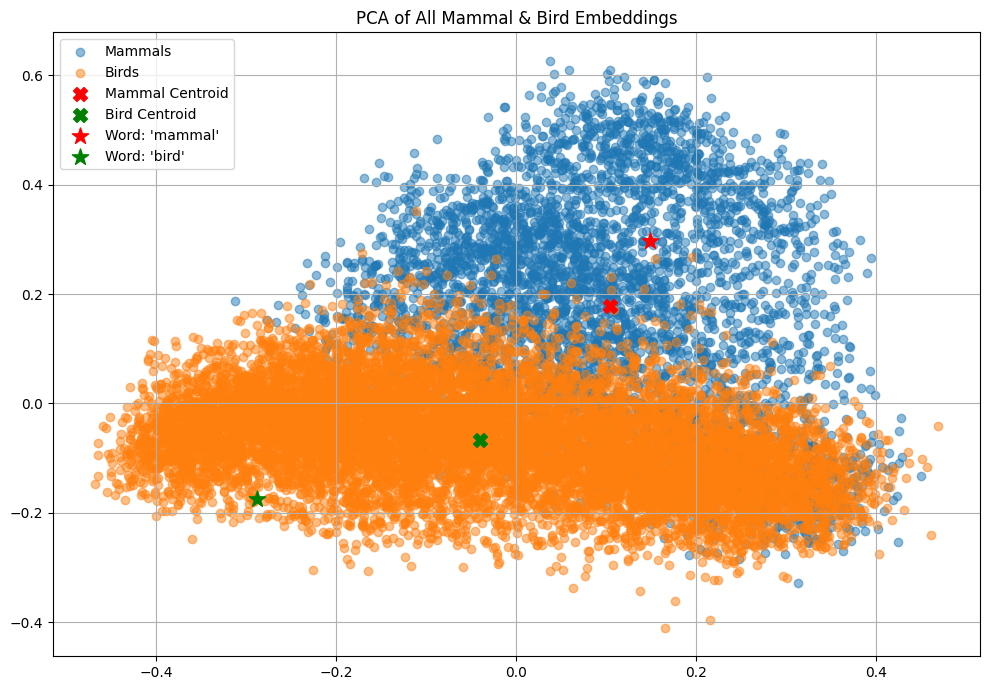

In [242]:
#PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Use all samples
mammal_sample = mammal_embeddings
bird_sample = bird_embeddings

# Ensure centroids and word vectors are 2D
centroid_mammal = centroid_mammal.reshape(1, -1)
centroid_bird = centroid_bird.reshape(1, -1)
embedding_word_mammal = embedding_word_mammal.reshape(1, -1)
embedding_word_bird = embedding_word_bird.reshape(1, -1)

# Stack everything for PCA
all_vectors = np.vstack([
    mammal_sample,
    bird_sample,
    centroid_mammal,
    centroid_bird,
    embedding_word_mammal,
    embedding_word_bird
])

# Run PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(all_vectors)

# Plot
plt.figure(figsize=(10, 7))
plt.scatter(
    pca_result[:len(mammal_sample), 0],
    pca_result[:len(mammal_sample), 1],
    label="Mammals",
    alpha=0.5
)
plt.scatter(
    pca_result[len(mammal_sample):len(mammal_sample)+len(bird_sample), 0],
    pca_result[len(mammal_sample):len(mammal_sample)+len(bird_sample), 1],
    label="Birds",
    alpha=0.5
)
plt.scatter(pca_result[-4, 0], pca_result[-4, 1], color='red', marker='X', s=100, label="Mammal Centroid")
plt.scatter(pca_result[-3, 0], pca_result[-3, 1], color='green', marker='X', s=100, label="Bird Centroid")
plt.scatter(pca_result[-2, 0], pca_result[-2, 1], color='red', marker='*', s=150, label="Word: 'mammal'")
plt.scatter(pca_result[-1, 0], pca_result[-1, 1], color='green', marker='*', s=150, label="Word: 'bird'")
plt.legend()
plt.title("PCA of All Mammal & Bird Embeddings")
plt.grid(True)
plt.tight_layout()
plt.show()


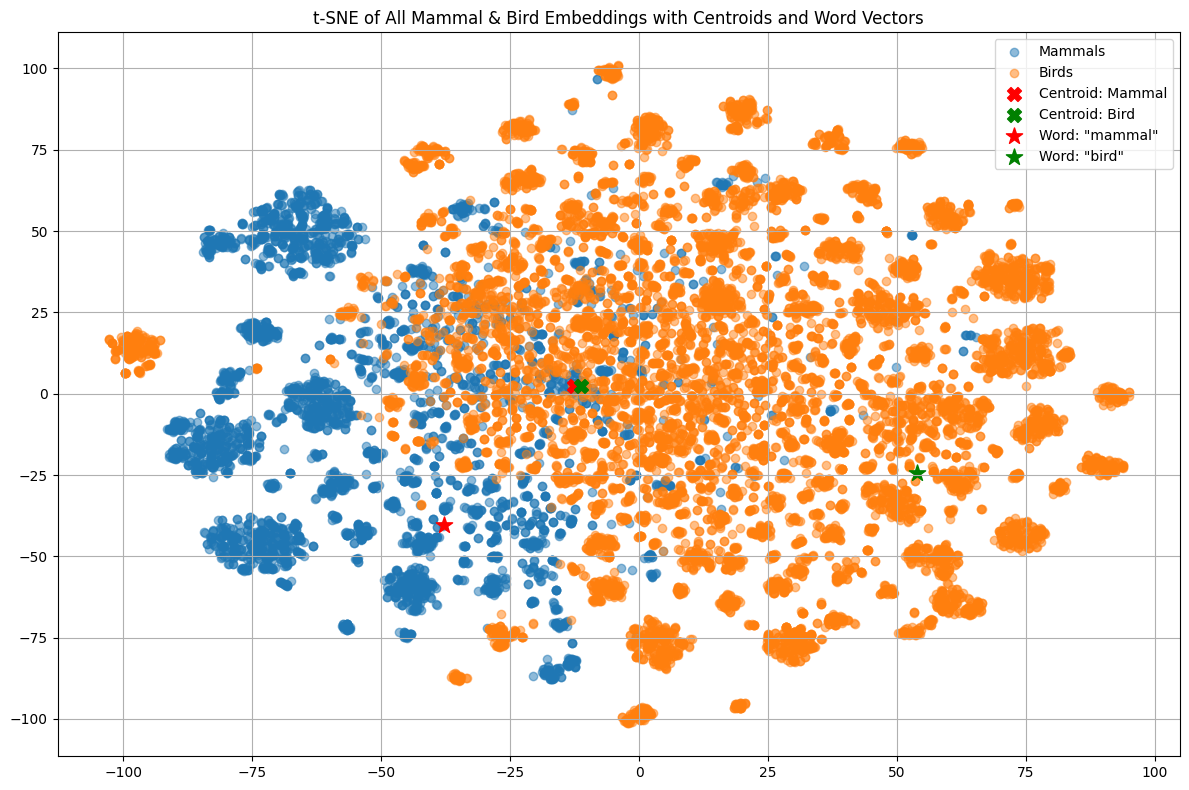

In [243]:
#t-SNE
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# Use all available samples
mammal_sample = mammal_embeddings
bird_sample = bird_embeddings

# Ensure vectors are 2D
centroid_mammal = centroid_mammal.reshape(1, -1)
centroid_bird = centroid_bird.reshape(1, -1)
embedding_word_mammal = embedding_word_mammal.reshape(1, -1)
embedding_word_bird = embedding_word_bird.reshape(1, -1)

# Stack all vectors
all_vectors = np.vstack([
    mammal_sample,
    bird_sample,
    centroid_mammal,
    centroid_bird,
    embedding_word_mammal,
    embedding_word_bird,
])

# Run t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(all_vectors)

# Track sizes
num_mammals = len(mammal_sample)
num_birds = len(bird_sample)

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(tsne_results[:num_mammals, 0], tsne_results[:num_mammals, 1], label='Mammals', alpha=0.5)
plt.scatter(tsne_results[num_mammals:num_mammals+num_birds, 0], tsne_results[num_mammals:num_mammals+num_birds, 1], label='Birds', alpha=0.5)
plt.scatter(tsne_results[-4, 0], tsne_results[-4, 1], color='red', marker='X', s=100, label='Centroid: Mammal')
plt.scatter(tsne_results[-3, 0], tsne_results[-3, 1], color='green', marker='X', s=100, label='Centroid: Bird')
plt.scatter(tsne_results[-2, 0], tsne_results[-2, 1], color='red', marker='*', s=150, label='Word: "mammal"')
plt.scatter(tsne_results[-1, 0], tsne_results[-1, 1], color='green', marker='*', s=150, label='Word: "bird"')

plt.legend()
plt.title("t-SNE of All Mammal & Bird Embeddings with Centroids and Word Vectors")
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


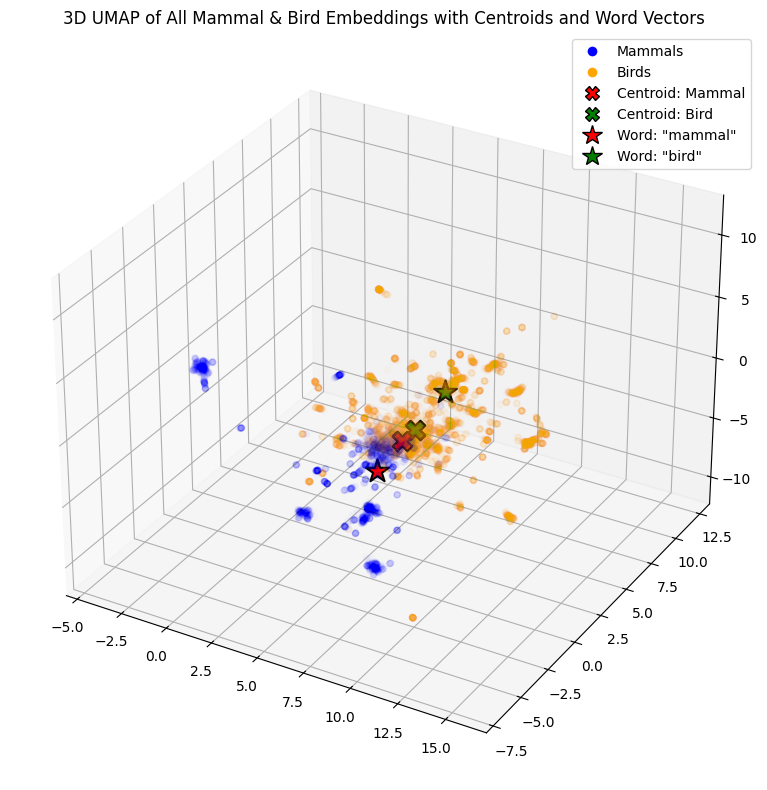

In [244]:
import umap
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

# Use all data
mammal_sample = mammal_embeddings
bird_sample = bird_embeddings

# Ensure centroid and word vectors are 2D
centroid_mammal = centroid_mammal.reshape(1, -1)
centroid_bird = centroid_bird.reshape(1, -1)
embedding_word_mammal = embedding_word_mammal.reshape(1, -1)
embedding_word_bird = embedding_word_bird.reshape(1, -1)

# Stack all vectors for projection
all_vectors = np.vstack([
    mammal_sample,
    bird_sample,
    centroid_mammal,
    centroid_bird,
    embedding_word_mammal,
    embedding_word_bird,
])

# Run 3D UMAP
reducer = umap.UMAP(n_components=3, random_state=42)
umap_results = reducer.fit_transform(all_vectors)

# Track sizes
num_mammals = len(mammal_sample)
num_birds = len(bird_sample)

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot samples with low alpha
ax.scatter(umap_results[:num_mammals, 0], umap_results[:num_mammals, 1], umap_results[:num_mammals, 2],
           color='blue', alpha=0.01)

ax.scatter(umap_results[num_mammals:num_mammals+num_birds, 0],
           umap_results[num_mammals:num_mammals+num_birds, 1],
           umap_results[num_mammals:num_mammals+num_birds, 2],
           color='orange', alpha=0.01)

# Plot centroids
ax.scatter(*umap_results[-4], color='red', marker='X', s=200, edgecolors='black', linewidths=1.5)
ax.scatter(*umap_results[-3], color='green', marker='X', s=200, edgecolors='black', linewidths=1.5)

# Plot concept words
ax.scatter(*umap_results[-2], color='red', marker='*', s=300, edgecolors='black', linewidths=1.5)
ax.scatter(*umap_results[-1], color='green', marker='*', s=300, edgecolors='black', linewidths=1.5)

# Custom proxy legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Mammals',
           markerfacecolor='blue', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Birds',
           markerfacecolor='orange', markersize=8),
    Line2D([0], [0], marker='X', color='red', label='Centroid: Mammal',
           markeredgecolor='black', markersize=10, linestyle='None'),
    Line2D([0], [0], marker='X', color='green', label='Centroid: Bird',
           markeredgecolor='black', markersize=10, linestyle='None'),
    Line2D([0], [0], marker='*', color='red', label='Word: "mammal"',
           markeredgecolor='black', markersize=15, linestyle='None'),
    Line2D([0], [0], marker='*', color='green', label='Word: "bird"',
           markeredgecolor='black', markersize=15,linestyle='None')
]

ax.legend(handles=legend_elements)

# Finalize
ax.set_title("3D UMAP of All Mammal & Bird Embeddings with Centroids and Word Vectors")
plt.tight_layout()
plt.show()


# **clustering mammal & bird embeddings together (K=2)**

In [245]:
all_names = mammal_names + bird_names
true_labels = [1] * len(mammal_names) + [0] * len(bird_names)  # 1 = mammal, 0 = bird

In [246]:
all_embeddings = np.vstack([
    mammal_embeddings,
    bird_embeddings
])
# true labels: 1 = mammal, 0 = bird
true_labels = [1] * len(mammal_embeddings) + [0] * len(bird_embeddings)

In [247]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(all_embeddings)

In [248]:
# Match clusters to actual categories
from collections import Counter

cluster_0_true = [true_labels[i] for i in range(len(cluster_labels)) if cluster_labels[i] == 0]
cluster_1_true = [true_labels[i] for i in range(len(cluster_labels)) if cluster_labels[i] == 1]

# cluster containing more mammals is assigned as more_mammal_cluster. The other cluster is named "more_bird_cluster"
if sum(cluster_0_true) > sum(cluster_1_true):
    more_mammal_cluster = 0
    more_bird_cluster = 1
else:
    more_mammal_cluster= 1
    more_bird_cluster = 0

counts_cluster_0 = Counter(cluster_0_true)
counts_cluster_1 = Counter(cluster_1_true)

print(f"\nAssigned Clusters:")
print(f"  Cluster {more_mammal_cluster} → More Mammals")
print(f"  Cluster {more_bird_cluster} → More Birds")

print("\nCluster 0 contains:")
print(f"  Mammals: {counts_cluster_0[1]}")
print(f"  Birds  : {counts_cluster_0[0]}")

print("\nCluster 1 contains:")
print(f"  Mammals: {counts_cluster_1[1]}")
print(f"  Birds  : {counts_cluster_1[0]}")



Assigned Clusters:
  Cluster 0 → More Mammals
  Cluster 1 → More Birds

Cluster 0 contains:
  Mammals: 3537
  Birds  : 4788

Cluster 1 contains:
  Mammals: 625
  Birds  : 6188


In [249]:
# cluster centroids saved
centroid_more_mammal = kmeans.cluster_centers_[more_mammal_cluster]
centroid_more_bird = kmeans.cluster_centers_[more_bird_cluster]

In [250]:
from sklearn.metrics.pairwise import cosine_similarity

embedding_word_mammal = model_all_mpnet.encode("mammal", normalize_embeddings=True)
embedding_word_bird = model_all_mpnet.encode("bird", normalize_embeddings=True)

word_mammal = embedding_word_mammal.reshape(1, -1)
word_bird = embedding_word_bird.reshape(1, -1)
centroid_more_mammal = centroid_more_mammal.reshape(1, -1)
centroid_more_bird = centroid_more_bird.reshape(1, -1)

sim_mammal_to_more_mammal = cosine_similarity(word_mammal, centroid_more_mammal)[0][0]
sim_mammal_to_more_bird = cosine_similarity(word_mammal, centroid_more_bird)[0][0]
sim_bird_to_more_mammal = cosine_similarity(word_bird, centroid_more_mammal)[0][0]
sim_bird_to_more_bird = cosine_similarity(word_bird, centroid_more_bird)[0][0]

print("mammal ⟷ centroid_more_mammal:", sim_mammal_to_more_mammal)
print("mammal ⟷ centroid_more_bird:  ", sim_mammal_to_more_bird)
print("bird   ⟷ centroid_more_mammal:", sim_bird_to_more_mammal)
print("bird   ⟷ centroid_more_bird:  ", sim_bird_to_more_bird)

mammal ⟷ centroid_more_mammal: 0.56992877
mammal ⟷ centroid_more_bird:   0.47013846
bird   ⟷ centroid_more_mammal: 0.52894235
bird   ⟷ centroid_more_bird:   0.6988307


In [251]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# All samples
vectors_to_plot = np.vstack([
    all_embeddings,
    centroid_more_mammal.reshape(1, -1),
    centroid_more_bird.reshape(1, -1),
    embedding_word_mammal.reshape(1, -1),
    embedding_word_bird.reshape(1, -1)
])

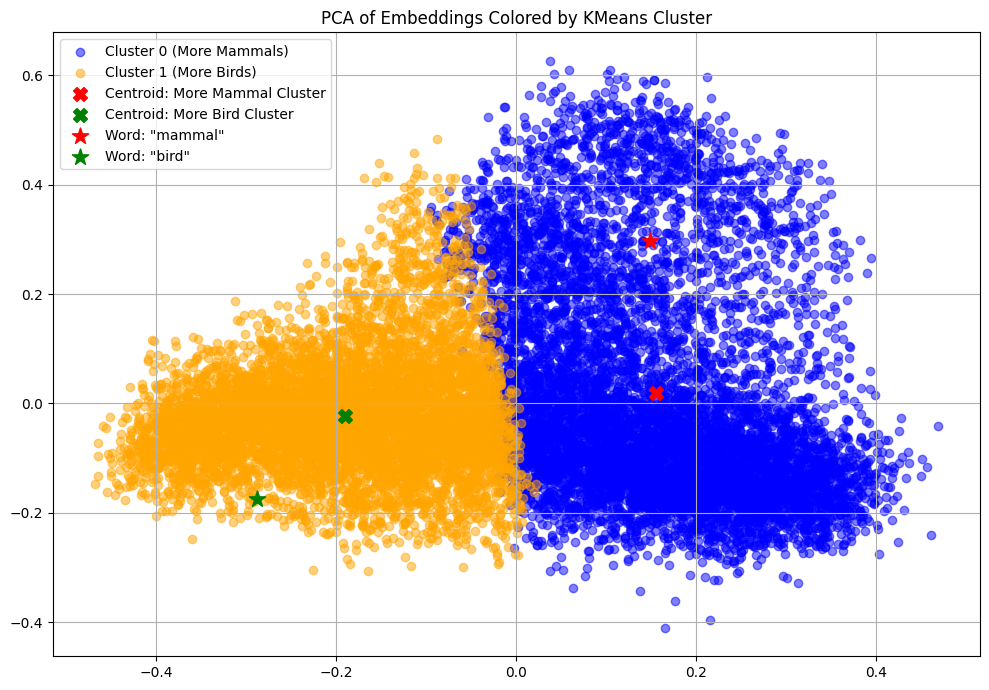

In [252]:
#PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(vectors_to_plot)

# Get length of embeddings
num_points = all_embeddings.shape[0]

# Split points by cluster label
cluster_0_indices = np.where(cluster_labels == 0)[0]
cluster_1_indices = np.where(cluster_labels == 1)[0]

# Plot
plt.figure(figsize=(10, 7))

plt.scatter(
    pca_result[cluster_0_indices, 0],
    pca_result[cluster_0_indices, 1],
    color='blue',
    alpha=0.5,
    label=f'Cluster 0 ({"More Mammals" if more_mammal_cluster == 0 else "More Birds"})'
)

plt.scatter(
    pca_result[cluster_1_indices, 0],
    pca_result[cluster_1_indices, 1],
    color='orange',
    alpha=0.5,
    label=f'Cluster 1 ({"More Mammals" if more_mammal_cluster == 1 else "More Birds"})'
)

# Add centroids and concept words
plt.scatter(pca_result[-4, 0], pca_result[-4, 1], color='red', marker='X', s=100, label="Centroid: More Mammal Cluster")
plt.scatter(pca_result[-3, 0], pca_result[-3, 1], color='green', marker='X', s=100, label="Centroid: More Bird Cluster")
plt.scatter(pca_result[-2, 0], pca_result[-2, 1], color='red', marker='*', s=150, label='Word: "mammal"')
plt.scatter(pca_result[-1, 0], pca_result[-1, 1], color='green', marker='*', s=150, label='Word: "bird"')

plt.title("PCA of Embeddings Colored by KMeans Cluster")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


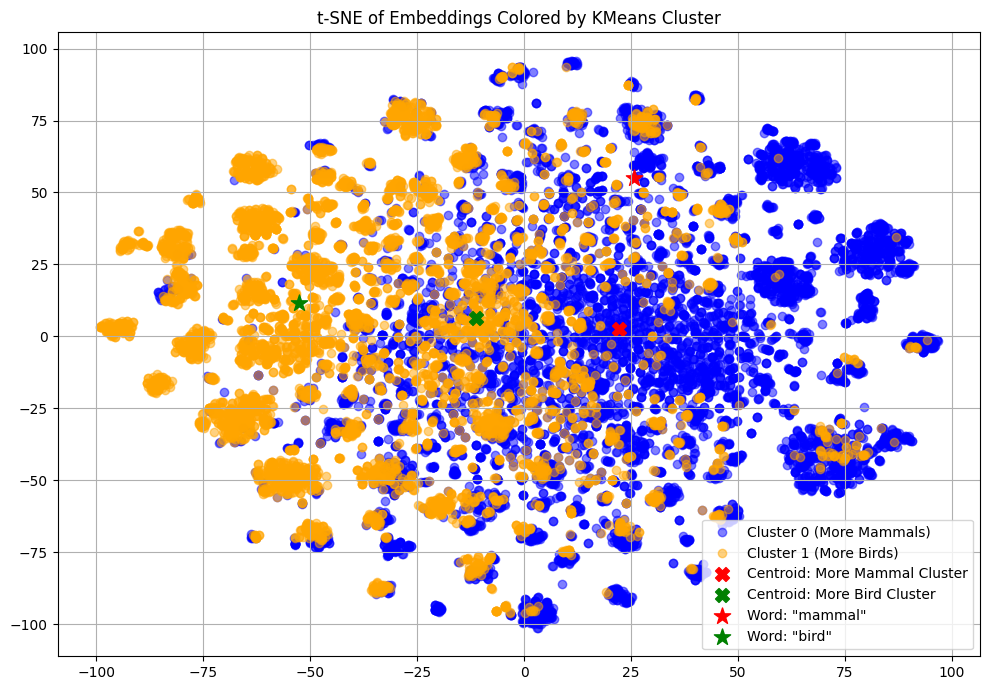

In [253]:
#2D t-SNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Combine vectors for t-SNE
vectors_to_plot = np.vstack([
    all_embeddings,
    centroid_more_mammal.reshape(1, -1),
    centroid_more_bird.reshape(1, -1),
    embedding_word_mammal.reshape(1, -1),
    embedding_word_bird.reshape(1, -1)
])

# Run t-SNE 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(vectors_to_plot)

# Cluster assignments
num_points = all_embeddings.shape[0]
cluster_0_indices = np.where(cluster_labels == 0)[0]
cluster_1_indices = np.where(cluster_labels == 1)[0]

# Plot
plt.figure(figsize=(10, 7))

plt.scatter(
    tsne_result[cluster_0_indices, 0],
    tsne_result[cluster_0_indices, 1],
    color='blue',
    alpha=0.5,
    label=f'Cluster 0 ({"More Mammals" if more_mammal_cluster == 0 else "More Birds"})'
)

plt.scatter(
    tsne_result[cluster_1_indices, 0],
    tsne_result[cluster_1_indices, 1],
    color='orange',
    alpha=0.5,
    label=f'Cluster 1 ({"More Mammals" if more_mammal_cluster == 1 else "More Birds"})'
)

# Add centroids and concept word points
plt.scatter(tsne_result[-4, 0], tsne_result[-4, 1], color='red', marker='X', s=100, label='Centroid: More Mammal Cluster')
plt.scatter(tsne_result[-3, 0], tsne_result[-3, 1], color='green', marker='X', s=100, label='Centroid: More Bird Cluster')
plt.scatter(tsne_result[-2, 0], tsne_result[-2, 1], color='red', marker='*', s=150, label='Word: "mammal"')
plt.scatter(tsne_result[-1, 0], tsne_result[-1, 1], color='green', marker='*', s=150, label='Word: "bird"')

plt.title("t-SNE of Embeddings Colored by KMeans Cluster")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


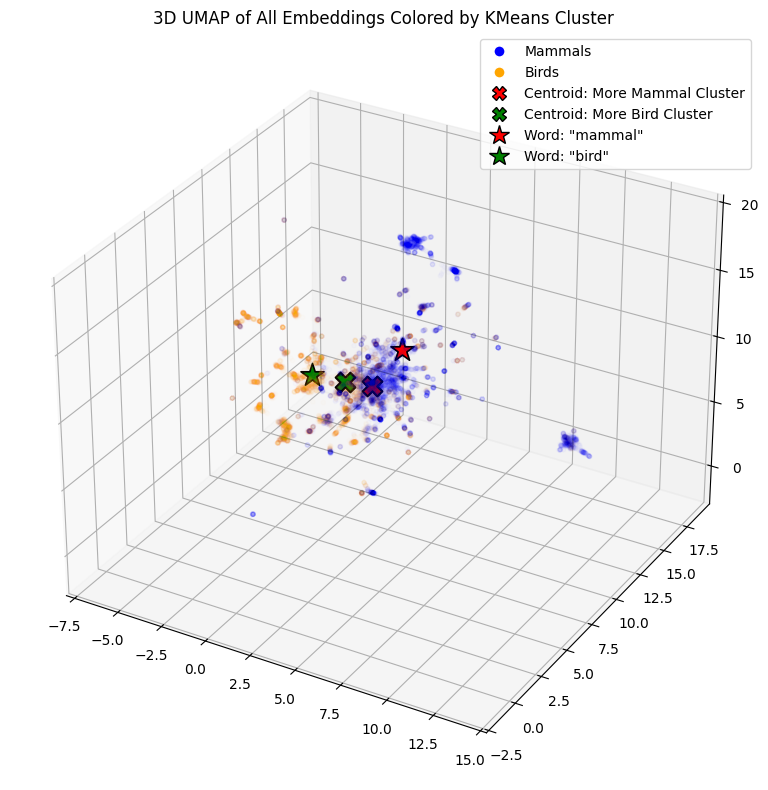

In [255]:
import umap
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

# Use all data (no sampling)
sampled_embeddings = all_embeddings
sampled_labels = cluster_labels

# Stack all data points with centroids and word embeddings
vectors_to_project = np.vstack([
    sampled_embeddings,
    centroid_more_mammal.reshape(1, -1),
    centroid_more_bird.reshape(1, -1),
    embedding_word_mammal.reshape(1, -1),
    embedding_word_bird.reshape(1, -1)
])

# Run 3D UMAP
reducer = umap.UMAP(n_components=3, random_state=42)
umap_result = reducer.fit_transform(vectors_to_project)

# Track point counts
num_points = sampled_embeddings.shape[0]
cluster_0_indices = np.where(sampled_labels == 0)[0]
cluster_1_indices = np.where(sampled_labels == 1)[0]

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# plot the clustered points
ax.scatter(umap_result[cluster_0_indices, 0], umap_result[cluster_0_indices, 1], umap_result[cluster_0_indices, 2],
           color='blue', alpha=0.01, s=10)

ax.scatter(umap_result[cluster_1_indices, 0], umap_result[cluster_1_indices, 1], umap_result[cluster_1_indices, 2],
           color='orange', alpha=0.01, s=10)

# plot the centroids
ax.scatter(*umap_result[-4], color='red', marker='X', s=200,
           edgecolors='black', linewidths=1.5, zorder=10)

ax.scatter(*umap_result[-3], color='green', marker='X', s=200,
           edgecolors='black', linewidths=1.5, zorder=10)

# plot the concept words
ax.scatter(*umap_result[-2], color='red', marker='*', s=300,
           edgecolors='black', linewidths=1.2, zorder=10)

ax.scatter(*umap_result[-1], color='green', marker='*', s=300,
           edgecolors='black', linewidths=1.2, zorder=10)

# Custom proxy handles for legend
legend_elements = [
    Line2D([0], [0], marker='o', linestyle='None', color='w',
           markerfacecolor='blue', markersize=8, label='Mammals'),
    Line2D([0], [0], marker='o', linestyle='None', color='w',
           markerfacecolor='orange', markersize=8, label='Birds'),
    Line2D([0], [0], marker='X', linestyle='None', color='red',
           markeredgecolor='black', markersize=10, label='Centroid: More Mammal Cluster'),
    Line2D([0], [0], marker='X', linestyle='None', color='green',
           markeredgecolor='black', markersize=10, label='Centroid: More Bird Cluster'),
    Line2D([0], [0], marker='*', linestyle='None', color='red',
           markeredgecolor='black', markersize=15, label='Word: "mammal"'),
    Line2D([0], [0], marker='*', linestyle='None', color='green',
           markeredgecolor='black', markersize=15, label='Word: "bird"'),
]

# Final plot settings
ax.set_title("3D UMAP of All Embeddings Colored by KMeans Cluster")
ax.legend(handles=legend_elements)
plt.tight_layout()
plt.show()


# **5) Which layer is best for this kind of representation?**

**Mammal layers analysis - TinyLlama (Kmeans (k=1))**

In [11]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

print("Loading LLaMA model...")
model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, output_hidden_states=True)


Loading LLaMA model...


tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:817: UserWarning: `return_dict_in_generate` is NOT set to `True`, but `output_hidden_states` is. When `return_dict_in_generate` is not `True`, `output_hidden_states` is ignored.
  warnings.warn(


generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
model = model.to(device)

Using device: cuda


In [13]:
def get_llama_token_embeddings(text, model, tokenizer, device):
    """
    Tokenizes 'text', runs it through the model, returns:
      - tokens: the token strings
      - all_hidden_states: tuple of [batch_size, seq_len, hidden_dim] across each layer
      - last_hidden_state: final layer hidden states
    """
    inputs = tokenizer(text, return_tensors="pt", max_length=256, truncation=True, padding=True).to(device)
    with torch.no_grad():
        outputs = model(**inputs, output_hidden_states=True)
    tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
    all_hidden_states = outputs.hidden_states  # tuple of length num_layers+1 (or +2)
    last_hidden_state = all_hidden_states[-1]
    return tokens, all_hidden_states, last_hidden_state

In [14]:
def get_last_token_vector(all_hidden_states, layer_idx):
    """
    Extract the "last token" vector from a specific layer.
    all_hidden_states[layer_idx]: shape [batch_size, seq_len, hidden_dim]
    Returns tensor on same device as input (GPU if applicable)
    """
    layer_output = all_hidden_states[layer_idx]      # shape: [1, seq_len, hidden_dim]
    last_token_vec = layer_output[:, -1, :].squeeze(0)  # shape: [hidden_dim]
    return last_token_vec

In [15]:
print(mammal_names)

['northern pudu', 'Central American red brocket', 'Pygmy brocket', 'Sao Paulo bororo', 'Ecuador red brocket', 'red brocket', 'dwarf brocket', 'Merida brocket', 'red brocket deer', 'reindeer', 'Yucatan brown brocket', 'white-tailed deer', 'mule deer', 'Chilean guemal', 'Peruvian guemal', 'Eurasian elk', 'American moose', 'Western roe deer', 'Eastern roe deer', 'marsh deer', 'gray brocket', 'pampas deer', 'Sambar', 'Visayan spotted deer', 'Javan rusa', 'Philippine sambar', 'barasingha', "Eld's deer", "Schomburgk's deer", 'Mesopotamian fallow deer', 'fallow deer', 'Central Asian red deer', 'sika deer', 'red deer', 'white-lipped deer', 'hog deer', 'Irish elk', 'Bawean deer', 'Hog deer', 'chital', "Pere David's deer", 'Chinese water deer', "Reeves' muntjac", 'muntjak', 'black muntjac', "Fea's muntjac", 'Annamite muntjac', 'Leaf deer', 'Roosevelt muntjac', 'giant muntjac', 'Gongshanensis muntjac', 'Bornean yellow muntjac', 'tufted deer', 'Asiatic mouflon', 'argali', 'bighorn sheep', 'urial',

In [16]:
import numpy as np
from tqdm import tqdm

# Get number of layers from one sample
_, hidden_states, _ = get_llama_token_embeddings(mammal_names[0], model, tokenizer, device)
n_all = len(hidden_states)
print(f"Total hidden_states = {n_all} (including embedding inputs, etc.).")

# Extract all layers
selected_layers = list(range(n_all))
print(f"Selected layers: {selected_layers}")

# Initialize container for each layer
mammal_layer_embeddings = {layer_idx: [] for layer_idx in selected_layers}

# Loop through all mammal names
print("Extracting last-token embeddings for each layer...")
for text in tqdm(mammal_names):
    tokens, all_hidden_states, _ = get_llama_token_embeddings(text, model, tokenizer, device)
    for layer_idx in selected_layers:
        vec = get_last_token_vector(all_hidden_states, layer_idx)  # shape: [hidden_dim]
        mammal_layer_embeddings[layer_idx].append(vec)

# Convert each list to NumPy array
for layer_idx in selected_layers:
    tensor_list = mammal_layer_embeddings[layer_idx]
    mammal_layer_embeddings[layer_idx] = np.array([
        tensor.cpu().numpy() if torch.is_tensor(tensor) else tensor
        for tensor in tensor_list
    ])
    shape = mammal_layer_embeddings[layer_idx].shape
    print(f"Layer {layer_idx}: shape = {shape} (num_mammals: {shape[0]}, hidden_dim: {shape[1]})")

print(f" Done. Extracted embeddings from {len(selected_layers)} layers.")


Total hidden_states = 23 (including embedding inputs, etc.).
Selected layers: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
Extracting last-token embeddings for each layer...


100%|██████████| 4162/4162 [01:54<00:00, 36.49it/s]


Layer 0: shape = (4162, 2048) (num_mammals: 4162, hidden_dim: 2048)
Layer 1: shape = (4162, 2048) (num_mammals: 4162, hidden_dim: 2048)
Layer 2: shape = (4162, 2048) (num_mammals: 4162, hidden_dim: 2048)
Layer 3: shape = (4162, 2048) (num_mammals: 4162, hidden_dim: 2048)
Layer 4: shape = (4162, 2048) (num_mammals: 4162, hidden_dim: 2048)
Layer 5: shape = (4162, 2048) (num_mammals: 4162, hidden_dim: 2048)
Layer 6: shape = (4162, 2048) (num_mammals: 4162, hidden_dim: 2048)
Layer 7: shape = (4162, 2048) (num_mammals: 4162, hidden_dim: 2048)
Layer 8: shape = (4162, 2048) (num_mammals: 4162, hidden_dim: 2048)
Layer 9: shape = (4162, 2048) (num_mammals: 4162, hidden_dim: 2048)
Layer 10: shape = (4162, 2048) (num_mammals: 4162, hidden_dim: 2048)
Layer 11: shape = (4162, 2048) (num_mammals: 4162, hidden_dim: 2048)
Layer 12: shape = (4162, 2048) (num_mammals: 4162, hidden_dim: 2048)
Layer 13: shape = (4162, 2048) (num_mammals: 4162, hidden_dim: 2048)
Layer 14: shape = (4162, 2048) (num_mammals:

In [17]:
# embedding for word "mammal"
word = "mammal"
_, word_hidden_states, _ = get_llama_token_embeddings(word, model, tokenizer, device)

# Get the last-token vector from each layer
word_mammal_vectors = [
    get_last_token_vector(word_hidden_states, i).cpu().numpy()
    for i in selected_layers
]

In [18]:
print(word_mammal_vectors)

[array([-0.00379944, -0.00209045,  0.00479126, ...,  0.01123047,
        0.01226807,  0.00312805], dtype=float32), array([-0.01102594, -0.00553581,  0.00255115, ...,  0.01577555,
        0.01791706,  0.00717095], dtype=float32), array([-4.0139430e-03, -1.3966810e-02, -5.5419747e-05, ...,
        9.2979772e-03,  5.2135140e-02, -3.7028221e-03], dtype=float32), array([-0.04893998, -0.03838681, -0.01864584, ...,  0.01974321,
        0.04957177,  0.00300939], dtype=float32), array([-0.03037177, -0.05754741, -0.01679913, ...,  0.0195754 ,
        0.06667431,  0.01928282], dtype=float32), array([-0.03241839, -0.05361924,  0.01309466, ..., -0.00384976,
        0.06050717,  0.03823257], dtype=float32), array([-0.04384675, -0.12745272, -0.00682561, ..., -0.04718946,
        0.0741585 ,  0.0761261 ], dtype=float32), array([-0.07168599, -0.14486215,  0.00417491, ..., -0.01709463,
        0.05866692,  0.0405316 ], dtype=float32), array([-0.03840183, -0.12697002,  0.03977175, ..., -0.00425636,
     

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import numpy as np

layer_similarities = []

for layer_idx in selected_layers:
    # Compute centroid using KMeans(k=1)
    kmeans = KMeans(n_clusters=1, random_state=42)
    kmeans.fit(mammal_layer_embeddings[layer_idx])
    centroid = kmeans.cluster_centers_[0].reshape(1, -1)

    # Get word embedding for "mammal" at this layer
    word_vec = word_mammal_vectors[layer_idx].reshape(1, -1)

    # Compute cosine similarity
    sim = cosine_similarity(centroid, word_vec)[0][0]
    layer_similarities.append(sim)

    print(f"Layer {layer_idx:2d}: cosine_similarity(centroid ⟷ 'mammal') = {sim:.4f}")


Layer  0: cosine_similarity(centroid ⟷ 'mammal') = 0.1634
Layer  1: cosine_similarity(centroid ⟷ 'mammal') = 0.7002
Layer  2: cosine_similarity(centroid ⟷ 'mammal') = 0.5161
Layer  3: cosine_similarity(centroid ⟷ 'mammal') = 0.3345
Layer  4: cosine_similarity(centroid ⟷ 'mammal') = 0.3919
Layer  5: cosine_similarity(centroid ⟷ 'mammal') = 0.4837
Layer  6: cosine_similarity(centroid ⟷ 'mammal') = 0.5696
Layer  7: cosine_similarity(centroid ⟷ 'mammal') = 0.5631
Layer  8: cosine_similarity(centroid ⟷ 'mammal') = 0.5726
Layer  9: cosine_similarity(centroid ⟷ 'mammal') = 0.6067
Layer 10: cosine_similarity(centroid ⟷ 'mammal') = 0.5734
Layer 11: cosine_similarity(centroid ⟷ 'mammal') = 0.6086
Layer 12: cosine_similarity(centroid ⟷ 'mammal') = 0.6135
Layer 13: cosine_similarity(centroid ⟷ 'mammal') = 0.6534
Layer 14: cosine_similarity(centroid ⟷ 'mammal') = 0.6555
Layer 15: cosine_similarity(centroid ⟷ 'mammal') = 0.6839
Layer 16: cosine_similarity(centroid ⟷ 'mammal') = 0.7333
Layer 17: cosi

In [20]:
best_layer = np.argmax(layer_similarities)
best_similarity = layer_similarities[best_layer]

print(f"\n Best conceptual layer = {best_layer} with cosine similarity = {best_similarity:.4f}")



 Best conceptual layer = 21 with cosine similarity = 0.8053


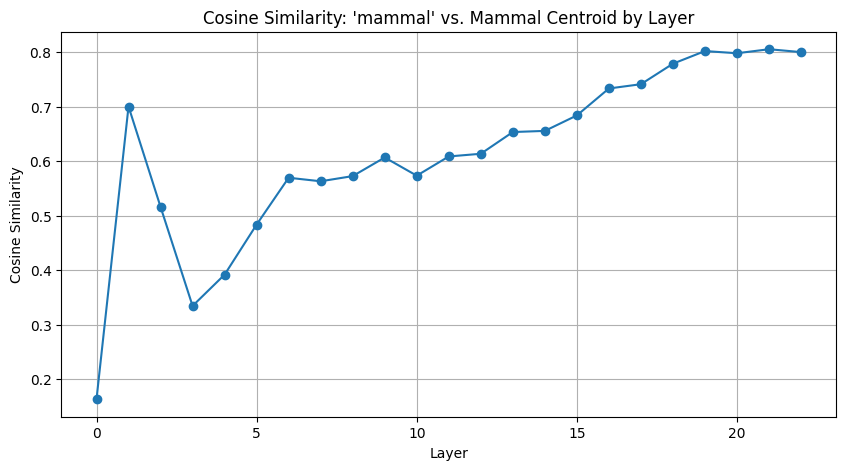

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(selected_layers, layer_similarities, marker='o')
plt.title("Cosine Similarity: 'mammal' vs. Mammal Centroid by Layer")
plt.xlabel("Layer")
plt.ylabel("Cosine Similarity")
plt.grid(True)
plt.show()


**Bird layer analysis - TinyLlama (Kmeans (k=1))**

In [22]:
import numpy as np
from tqdm import tqdm

# Step 1: Get number of layers from one sample
_, hidden_states, _ = get_llama_token_embeddings(bird_names[0], model, tokenizer, device)
n_all = len(hidden_states)
print(f"Total hidden_states = {n_all} (including embedding inputs, etc.).")

# Step 2: Extract all layers
selected_layers = list(range(n_all))
print(f"Selected layers: {selected_layers}")

# Step 3: Initialize container for each layer
bird_layer_embeddings = {layer_idx: [] for layer_idx in selected_layers}

# Step 4: Loop through all bird names
print("Extracting last-token embeddings for each layer (birds)...")
for text in tqdm(bird_names):
    tokens, all_hidden_states, _ = get_llama_token_embeddings(text, model, tokenizer, device)
    for layer_idx in selected_layers:
        vec = get_last_token_vector(all_hidden_states, layer_idx)
        bird_layer_embeddings[layer_idx].append(vec)

# Step 5: Convert to NumPy arrays
for layer_idx in selected_layers:
    tensor_list = bird_layer_embeddings[layer_idx]
    bird_layer_embeddings[layer_idx] = np.array([
        tensor.cpu().numpy() if torch.is_tensor(tensor) else tensor
        for tensor in tensor_list
    ])
    shape = bird_layer_embeddings[layer_idx].shape
    print(f"Layer {layer_idx}: shape = {shape} (num_birds: {shape[0]}, hidden_dim: {shape[1]})")

print(f"Extracted bird embeddings from {len(selected_layers)} layers.")

Total hidden_states = 23 (including embedding inputs, etc.).
Selected layers: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
Extracting last-token embeddings for each layer (birds)...


100%|██████████| 10976/10976 [05:02<00:00, 36.25it/s]


Layer 0: shape = (10976, 2048) (num_birds: 10976, hidden_dim: 2048)
Layer 1: shape = (10976, 2048) (num_birds: 10976, hidden_dim: 2048)
Layer 2: shape = (10976, 2048) (num_birds: 10976, hidden_dim: 2048)
Layer 3: shape = (10976, 2048) (num_birds: 10976, hidden_dim: 2048)
Layer 4: shape = (10976, 2048) (num_birds: 10976, hidden_dim: 2048)
Layer 5: shape = (10976, 2048) (num_birds: 10976, hidden_dim: 2048)
Layer 6: shape = (10976, 2048) (num_birds: 10976, hidden_dim: 2048)
Layer 7: shape = (10976, 2048) (num_birds: 10976, hidden_dim: 2048)
Layer 8: shape = (10976, 2048) (num_birds: 10976, hidden_dim: 2048)
Layer 9: shape = (10976, 2048) (num_birds: 10976, hidden_dim: 2048)
Layer 10: shape = (10976, 2048) (num_birds: 10976, hidden_dim: 2048)
Layer 11: shape = (10976, 2048) (num_birds: 10976, hidden_dim: 2048)
Layer 12: shape = (10976, 2048) (num_birds: 10976, hidden_dim: 2048)
Layer 13: shape = (10976, 2048) (num_birds: 10976, hidden_dim: 2048)
Layer 14: shape = (10976, 2048) (num_birds: 

In [24]:
# get embedding for word "bird" from all layers
word = "bird"
_, word_hidden_states_bird, _ = get_llama_token_embeddings(word, model, tokenizer, device)

word_bird_vectors = [
    get_last_token_vector(word_hidden_states_bird, i).cpu().numpy()
    for i in selected_layers
]

In [25]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import numpy as np

layer_similarities = []

for layer_idx in selected_layers:
    # Step 1: Compute centroid using KMeans(k=1)
    kmeans = KMeans(n_clusters=1, random_state=42)
    kmeans.fit(bird_layer_embeddings[layer_idx])
    centroid = kmeans.cluster_centers_[0].reshape(1, -1)

    # Step 2: Get word embedding for "bird" at this layer
    word_vec = word_bird_vectors[layer_idx].reshape(1, -1)

    # Step 3: Compute cosine similarity
    sim = cosine_similarity(centroid, word_vec)[0][0]
    layer_similarities.append(sim)

    print(f"Layer {layer_idx:2d}: cosine_similarity(centroid ⟷ 'bird') = {sim:.4f}")

Layer  0: cosine_similarity(centroid ⟷ 'bird') = 0.1794
Layer  1: cosine_similarity(centroid ⟷ 'bird') = 0.4410
Layer  2: cosine_similarity(centroid ⟷ 'bird') = 0.5632
Layer  3: cosine_similarity(centroid ⟷ 'bird') = 0.4104
Layer  4: cosine_similarity(centroid ⟷ 'bird') = 0.4232
Layer  5: cosine_similarity(centroid ⟷ 'bird') = 0.5032
Layer  6: cosine_similarity(centroid ⟷ 'bird') = 0.5648
Layer  7: cosine_similarity(centroid ⟷ 'bird') = 0.5573
Layer  8: cosine_similarity(centroid ⟷ 'bird') = 0.4898
Layer  9: cosine_similarity(centroid ⟷ 'bird') = 0.4895
Layer 10: cosine_similarity(centroid ⟷ 'bird') = 0.4896
Layer 11: cosine_similarity(centroid ⟷ 'bird') = 0.5222
Layer 12: cosine_similarity(centroid ⟷ 'bird') = 0.5206
Layer 13: cosine_similarity(centroid ⟷ 'bird') = 0.5472
Layer 14: cosine_similarity(centroid ⟷ 'bird') = 0.5502
Layer 15: cosine_similarity(centroid ⟷ 'bird') = 0.5592
Layer 16: cosine_similarity(centroid ⟷ 'bird') = 0.6280
Layer 17: cosine_similarity(centroid ⟷ 'bird') =

In [26]:
best_layer = np.argmax(layer_similarities)
best_similarity = layer_similarities[best_layer]

print(f"\n Best conceptual layer = {best_layer} with cosine similarity = {best_similarity:.4f}")


 Best conceptual layer = 20 with cosine similarity = 0.7260


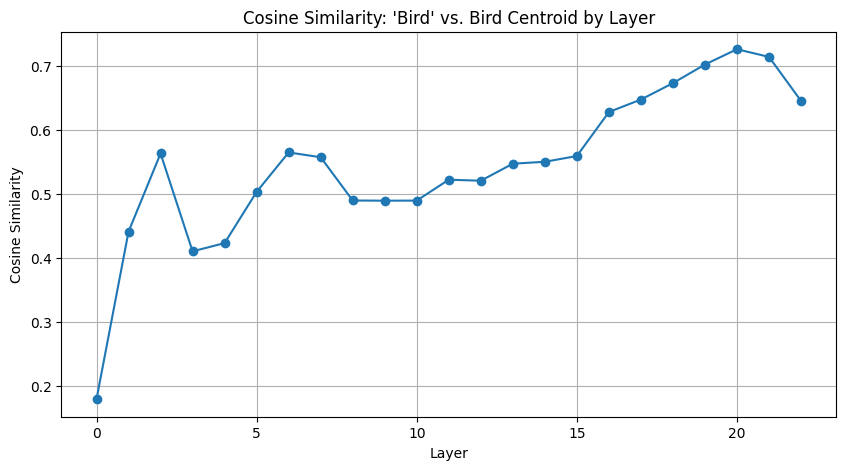

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(selected_layers, layer_similarities, marker='o')
plt.title("Cosine Similarity: 'Bird' vs. Bird Centroid by Layer")
plt.xlabel("Layer")
plt.ylabel("Cosine Similarity")
plt.grid(True)
plt.show()


# **Kmeans n_cluster = 2 with combined dataset (Mammal + Bird)**

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
import numpy as np

similarity_results = []

for layer_idx in selected_layers:
    print(f"\n Layer {layer_idx}")

    # Combine mammal and bird embeddings
    mammal_vectors = mammal_layer_embeddings[layer_idx]
    bird_vectors = bird_layer_embeddings[layer_idx]
    all_vectors = np.vstack([mammal_vectors, bird_vectors])
    true_labels = [1] * len(mammal_vectors) + [0] * len(bird_vectors)  # 1 = mammal, 0 = bird

    # Run KMeans clustering (k=2)
    kmeans = KMeans(n_clusters=2, random_state=42)
    cluster_labels = kmeans.fit_predict(all_vectors)

    # Match clusters to labels using majority vote
    cluster_0_true = [true_labels[i] for i in range(len(cluster_labels)) if cluster_labels[i] == 0]
    cluster_1_true = [true_labels[i] for i in range(len(cluster_labels)) if cluster_labels[i] == 1]

    if sum(cluster_0_true) > sum(cluster_1_true):
        mammal_cluster = 0
        bird_cluster = 1
    else:
        mammal_cluster = 1
        bird_cluster = 0

    # Extract centroids
    centroid_mammal = kmeans.cluster_centers_[mammal_cluster]
    centroid_bird = kmeans.cluster_centers_[bird_cluster]

    # Word vectors from current layer
    word_mammal = word_mammal_vectors[layer_idx].reshape(1, -1)
    word_bird = word_bird_vectors[layer_idx].reshape(1, -1)

    # Cosine similarities
    sim_mammal_to_mammal = cosine_similarity([centroid_mammal], word_mammal)[0][0]
    sim_mammal_to_bird = cosine_similarity([centroid_bird], word_mammal)[0][0]
    sim_bird_to_mammal = cosine_similarity([centroid_mammal], word_bird)[0][0]
    sim_bird_to_bird = cosine_similarity([centroid_bird], word_bird)[0][0]

    # Store results
    similarity_results.append({
        "layer": layer_idx,
        "sim_mammal_to_mammal": sim_mammal_to_mammal,
        "sim_mammal_to_bird": sim_mammal_to_bird,
        "sim_bird_to_mammal": sim_bird_to_mammal,
        "sim_bird_to_bird": sim_bird_to_bird
    })

    # Print summary for the layer
    print(f"  'word mammal' ⟷ mammal centroid: {sim_mammal_to_mammal:.4f}")
    print(f"  'word mammal' ⟷ bird centroid:   {sim_mammal_to_bird:.4f}")
    print(f"  'word bird'   ⟷ mammal centroid: {sim_bird_to_mammal:.4f}")
    print(f"  'word bird'   ⟷ bird centroid:   {sim_bird_to_bird:.4f}")


 Layer 0
  'word mammal' ⟷ mammal centroid: 0.2706
  'word mammal' ⟷ bird centroid:   0.1194
  'word bird'   ⟷ mammal centroid: 0.2009
  'word bird'   ⟷ bird centroid:   0.0176

 Layer 1
  'word mammal' ⟷ mammal centroid: 0.7581
  'word mammal' ⟷ bird centroid:   0.4381
  'word bird'   ⟷ mammal centroid: 0.4570
  'word bird'   ⟷ bird centroid:   0.2423

 Layer 2
  'word mammal' ⟷ mammal centroid: 0.5641
  'word mammal' ⟷ bird centroid:   0.4378
  'word bird'   ⟷ mammal centroid: 0.5226
  'word bird'   ⟷ bird centroid:   0.6697

 Layer 3
  'word mammal' ⟷ mammal centroid: 0.3565
  'word mammal' ⟷ bird centroid:   0.1502
  'word bird'   ⟷ mammal centroid: 0.4308
  'word bird'   ⟷ bird centroid:   0.2004

 Layer 4
  'word mammal' ⟷ mammal centroid: 0.3829
  'word mammal' ⟷ bird centroid:   0.2452
  'word bird'   ⟷ mammal centroid: 0.4463
  'word bird'   ⟷ bird centroid:   0.2586

 Layer 5
  'word mammal' ⟷ mammal centroid: 0.4895
  'word mammal' ⟷ bird centroid:   0.1679
  'word bird'   

In [256]:
# Find best layer for 'mammal'
best_mammal_layer = max(similarity_results, key=lambda x: x["sim_mammal_to_mammal"])

# Find best layer for 'bird'
best_bird_layer = max(similarity_results, key=lambda x: x["sim_bird_to_bird"])

# Print the results
print("\nBest Layers:")
print(f" Highest 'word mammal' ⟷ mammal centroid: Layer {best_mammal_layer['layer']} (similarity = {best_mammal_layer['sim_mammal_to_mammal']:.4f})")
print(f" Highest 'word bird'   ⟷ bird centroid:   Layer {best_bird_layer['layer']} (similarity = {best_bird_layer['sim_bird_to_bird']:.4f})")



Best Layers:
 Highest 'word mammal' ⟷ mammal centroid: Layer 20 (similarity = 0.7913)
 Highest 'word bird'   ⟷ bird centroid:   Layer 20 (similarity = 0.7003)


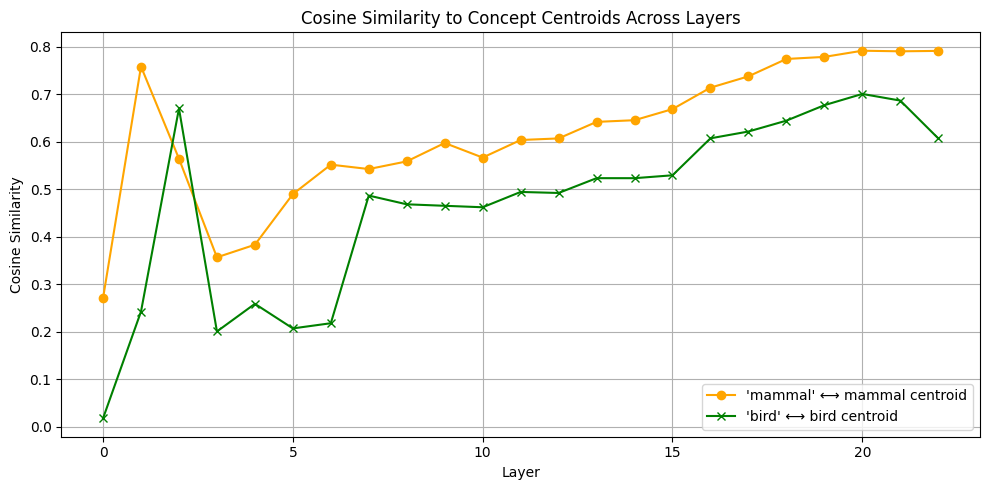

In [257]:
import matplotlib.pyplot as plt

# Extract values
layers = [r["layer"] for r in similarity_results]
mammal_sims = [r["sim_mammal_to_mammal"] for r in similarity_results]
bird_sims = [r["sim_bird_to_bird"] for r in similarity_results]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(layers, mammal_sims, marker='o', label="'mammal' ⟷ mammal centroid", color='orange')
plt.plot(layers, bird_sims, marker='x', label="'bird' ⟷ bird centroid", color='green')

plt.title("Cosine Similarity to Concept Centroids Across Layers")
plt.xlabel("Layer")
plt.ylabel("Cosine Similarity")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [258]:
# Visualization
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Get best layer index
layer_idx = best_mammal_layer['layer']

# Sample 200 examples for visualization
num_samples = 200
mammal_sample = mammal_layer_embeddings[layer_idx][:num_samples]
bird_sample = bird_layer_embeddings[layer_idx][:num_samples]

# Centroids and word vectors at best layer
centroid_mammal = np.mean(mammal_layer_embeddings[layer_idx], axis=0)
centroid_bird = np.mean(bird_layer_embeddings[layer_idx], axis=0)
embedding_word_mammal = word_mammal_vectors[layer_idx]
embedding_word_bird = word_bird_vectors[layer_idx]

# Stack all vectors
all_vectors = np.vstack([
    mammal_sample,
    bird_sample,
    centroid_mammal.reshape(1, -1),
    centroid_bird.reshape(1, -1),
    embedding_word_mammal.reshape(1, -1),
    embedding_word_bird.reshape(1, -1)
])


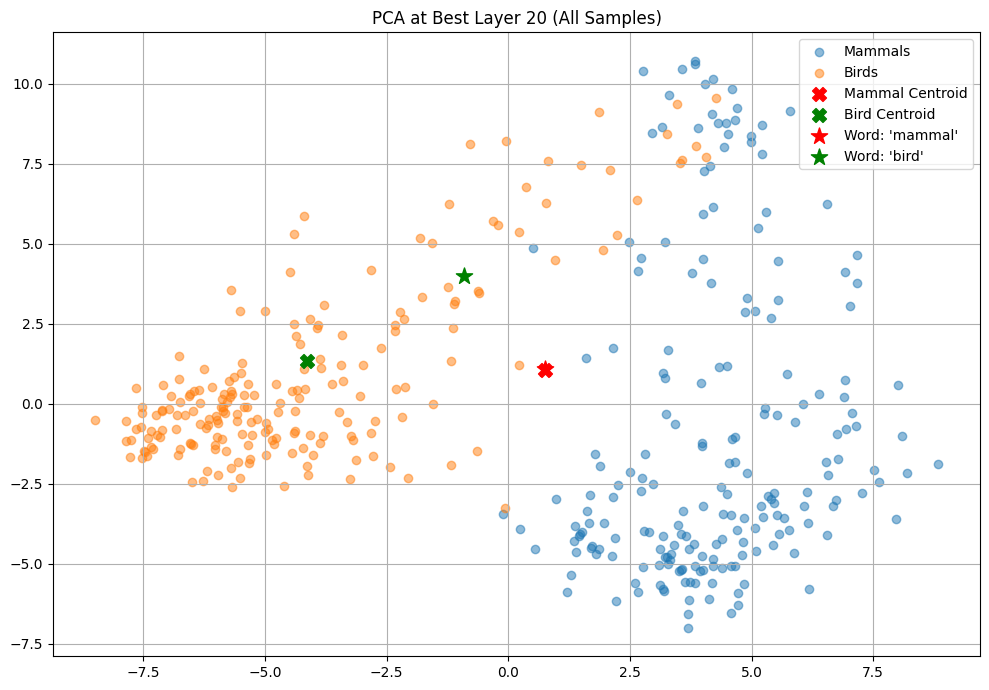

In [259]:
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(all_vectors)

# Index tracking
num_mammals = len(mammal_sample)
num_birds = len(bird_sample)

# Plot
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:num_mammals, 0], pca_result[:num_mammals, 1], label="Mammals", alpha=0.5)
plt.scatter(pca_result[num_mammals:num_mammals+num_birds, 0], pca_result[num_mammals:num_mammals+num_birds, 1], label="Birds", alpha=0.5)
plt.scatter(pca_result[-4, 0], pca_result[-4, 1], color='red', marker='X', s=100, label="Mammal Centroid")
plt.scatter(pca_result[-3, 0], pca_result[-3, 1], color='green', marker='X', s=100, label="Bird Centroid")
plt.scatter(pca_result[-2, 0], pca_result[-2, 1], color='red', marker='*', s=150, label="Word: 'mammal'")
plt.scatter(pca_result[-1, 0], pca_result[-1, 1], color='green', marker='*', s=150, label="Word: 'bird'")
plt.legend()
plt.title(f"PCA at Best Layer {layer_idx} (All Samples)")
plt.grid()
plt.tight_layout()
plt.show()


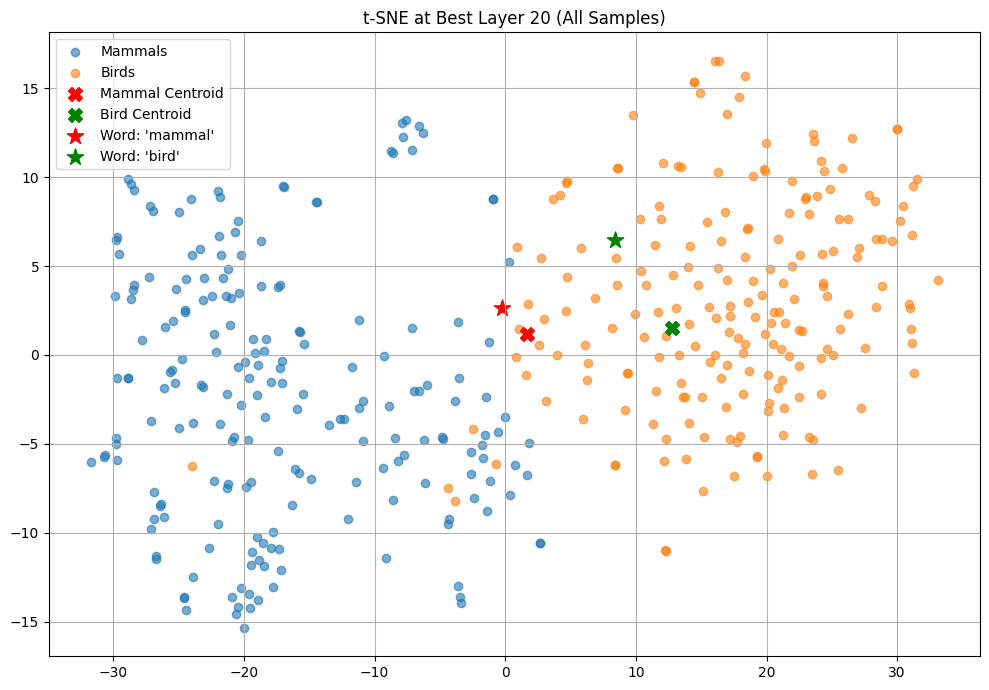

In [260]:
# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(all_vectors)

# Track sizes
num_mammals = len(mammal_sample)
num_birds = len(bird_sample)

# Plot
plt.figure(figsize=(10, 7))
plt.scatter(tsne_result[:num_mammals, 0], tsne_result[:num_mammals, 1], label="Mammals", alpha=0.6)
plt.scatter(tsne_result[num_mammals:num_mammals+num_birds, 0], tsne_result[num_mammals:num_mammals+num_birds, 1], label="Birds", alpha=0.6)
plt.scatter(tsne_result[-4, 0], tsne_result[-4, 1], color='red', marker='X', s=100, label="Mammal Centroid")
plt.scatter(tsne_result[-3, 0], tsne_result[-3, 1], color='green', marker='X', s=100, label="Bird Centroid")
plt.scatter(tsne_result[-2, 0], tsne_result[-2, 1], color='red', marker='*', s=150, label="Word: 'mammal'")
plt.scatter(tsne_result[-1, 0], tsne_result[-1, 1], color='green', marker='*', s=150, label="Word: 'bird'")
plt.legend()
plt.title(f"t-SNE at Best Layer {layer_idx} (All Samples)")
plt.grid(True)
plt.tight_layout()
plt.show()



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


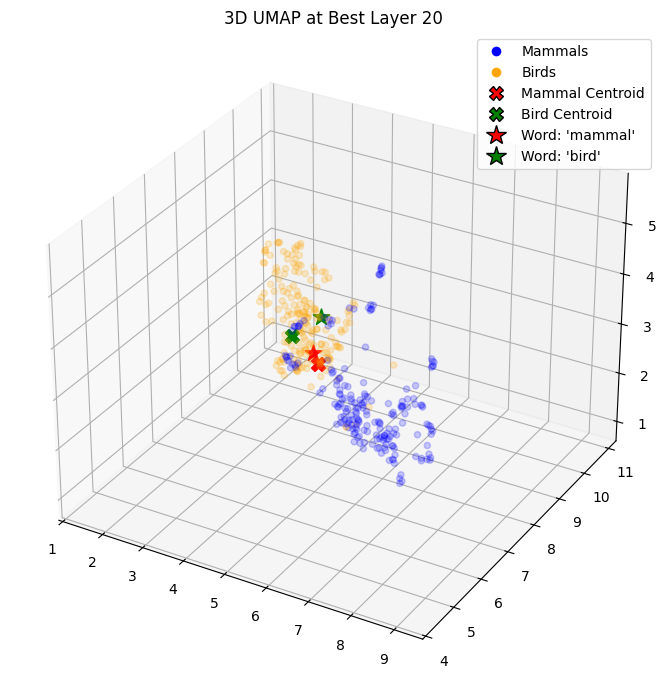

In [267]:
import umap
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

# Run 3D UMAP
reducer = umap.UMAP(n_components=3, random_state=42)
umap_result = reducer.fit_transform(all_vectors)

# Track sizes
num_mammals = len(mammal_sample)
num_birds = len(bird_sample)

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot mammal and bird samples
ax.scatter(umap_result[:num_mammals, 0], umap_result[:num_mammals, 1], umap_result[:num_mammals, 2],
           color='blue', alpha=0.2)

ax.scatter(umap_result[num_mammals:num_mammals+num_birds, 0],
           umap_result[num_mammals:num_mammals+num_birds, 1],
           umap_result[num_mammals:num_mammals+num_birds, 2],
           color='orange', alpha=0.2)

# Plot centroids
ax.scatter(umap_result[-4, 0], umap_result[-4, 1], umap_result[-4, 2],
           color='red', marker='X', s=100)

ax.scatter(umap_result[-3, 0], umap_result[-3, 1], umap_result[-3, 2],
           color='green', marker='X', s=100)

# Plot concept word embeddings
ax.scatter(umap_result[-2, 0], umap_result[-2, 1], umap_result[-2, 2],
           color='red', marker='*', s=150)

ax.scatter(umap_result[-1, 0], umap_result[-1, 1], umap_result[-1, 2],
           color='green', marker='*', s=150)

# Create custom proxy legend handles
legend_elements = [
    Line2D([0], [0], marker='o', linestyle='None', color='w',
           markerfacecolor='blue', markersize=8, label='Mammals'),
    Line2D([0], [0], marker='o', linestyle='None', color='w',
           markerfacecolor='orange', markersize=8, label='Birds'),
    Line2D([0], [0], marker='X', linestyle='None', color='red',
           markeredgecolor='black', markersize=10, label='Mammal Centroid'),
    Line2D([0], [0], marker='X', linestyle='None', color='green',
           markeredgecolor='black', markersize=10, label='Bird Centroid'),
    Line2D([0], [0], marker='*', linestyle='None', color='red',
           markeredgecolor='black', markersize=15, label="Word: 'mammal'"),
    Line2D([0], [0], marker='*', linestyle='None', color='green',
           markeredgecolor='black', markersize=15, label="Word: 'bird'")
]

# Finalize plot
ax.set_title(f"3D UMAP at Best Layer {layer_idx}")
ax.legend(handles=legend_elements)
plt.tight_layout()
plt.show()
